# Data Science Masters :Assignment 23

# Problem:
Predicting Survival in the Titanic Data Set.
We will be using a decision tree to make predictions about the Titanic data set from Kaggle. This data set provides information on the Titanic passengers and can be used to predict whether a passenger survived or not.

# Solution: 

Importing Libraries...

In [1]:
%matplotlib inline 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb 
from IPython.display import Image, display  
import pydotplus
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report

Data Pre-processing Steps

In [2]:
# load dataset
# Load Dataset and Convert it into Datafarme
df=pd.read_csv("https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Exploring Data - Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Looks like, there are some null values in the given dataset

In [5]:
print("The No. of rows in titanic data : {0}\nThe No. of columns in titanic data : {1}" .format(str(df.shape[0]),str(df.shape[1])))

The No. of rows in titanic data : 891
The No. of columns in titanic data : 12


In [6]:
# Statictical observation
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Fill null values with Mean for numerical datatatype features
df=df.fillna(df.mean())

In [8]:
df.Survived.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

61.6 % of passengers had not survived and 38.3 % had survived.

Data Visualisation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EA0FB00780>,
      dtype=object)

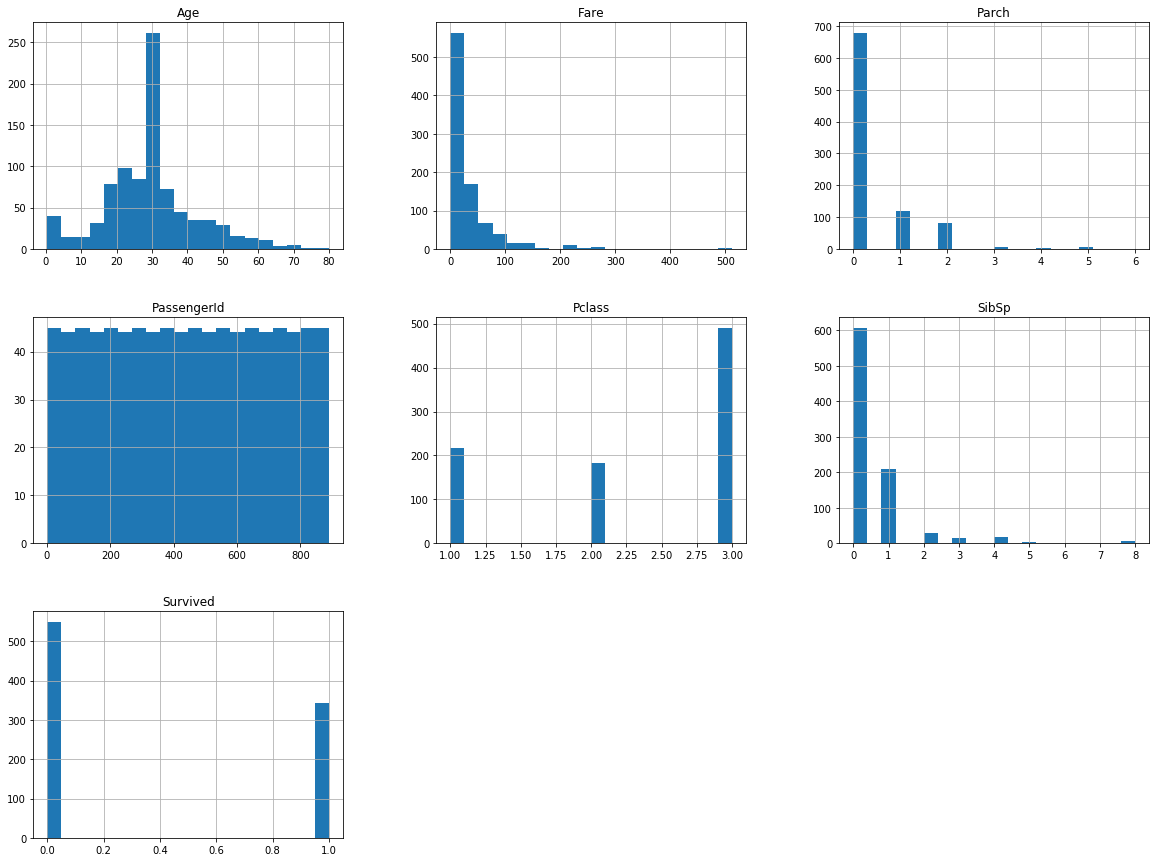

In [9]:
df.hist(bins=20,figsize=(20,15))

As stated in the given problem , analysis need to be done based upon these features (Pclass, Sex, Age, SibSp (Siblings aboard), Parch (Parents/children aboard) ,and Fare)

Create a dataframe having these features from titainc dataset.

In [10]:
df_titanic = df[['Survived','Pclass', 'Sex', 'Age', 'SibSp','Parch','Fare']]
df_titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [11]:
# Transforming Text values of "Sex" feature into Numerical values
# pandas.factorize() to convert Categorical object into numerical values
#replacing 'male' with Zero and 'female' with 1
df_titanic['Sex'], _ = pd.factorize(df_titanic['Sex'])
df_titanic.head(5)

C:\Users\mkarthikeyan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


Select features

In [12]:
y = pd.DataFrame(df_titanic['Survived'])
X = df_titanic[['Pclass', 'Sex', 'Age', 'SibSp','Parch','Fare']]

Splitting Data into Train and Test set

In [13]:
# split data randomly into 80% training and 20% test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40 , shuffle=True)
print("The Size of Fetures data(X) for Training set" , X_train.shape)
print("The Size of Fetures data(X) for Test set" , X_test.shape)
print("The Size of Target data(y) for Training set" , y_train.shape)
print("The Size of Target data(y) for Test set" , y_test.shape)

The Size of Fetures data(X) for Training set (712, 6)
The Size of Fetures data(X) for Test set (179, 6)
The Size of Target data(y) for Training set (712, 1)
The Size of Target data(y) for Test set (179, 1)


# Decision Tree Modeling

In [14]:
from sklearn.tree import DecisionTreeClassifier
# creating decision tree classifier based upon gini and splitting the data with best strategy...
dec_Tree_Model = DecisionTreeClassifier(criterion='gini' , random_state=0 , splitter='best')

In [15]:
# Selection of dependent and independent variables....
dependentFeatures = y.columns.tolist()  # Dependent variable
independentFeatures = X.columns.tolist() # Independent variable

#Creating target claas variable for passengers for survived (1) or not-survived (0)
target_cls = {y.Survived.unique()[0]:'Not-Survived',y.Survived.unique()[1]:'Survived'}
target_cls_var=list(target_cls.values())

print("Dependent Variable:",dependentFeatures)
print("Independent Variable:",independentFeatures)
print("Target class Variable:",target_cls_var)

Dependent Variable: ['Survived']
Independent Variable: ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
Target class Variable: ['Not-Survived', 'Survived']


Fitting the model with train set

In [16]:
dec_Tree_Model.fit(X_train[independentFeatures], y_train[dependentFeatures])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

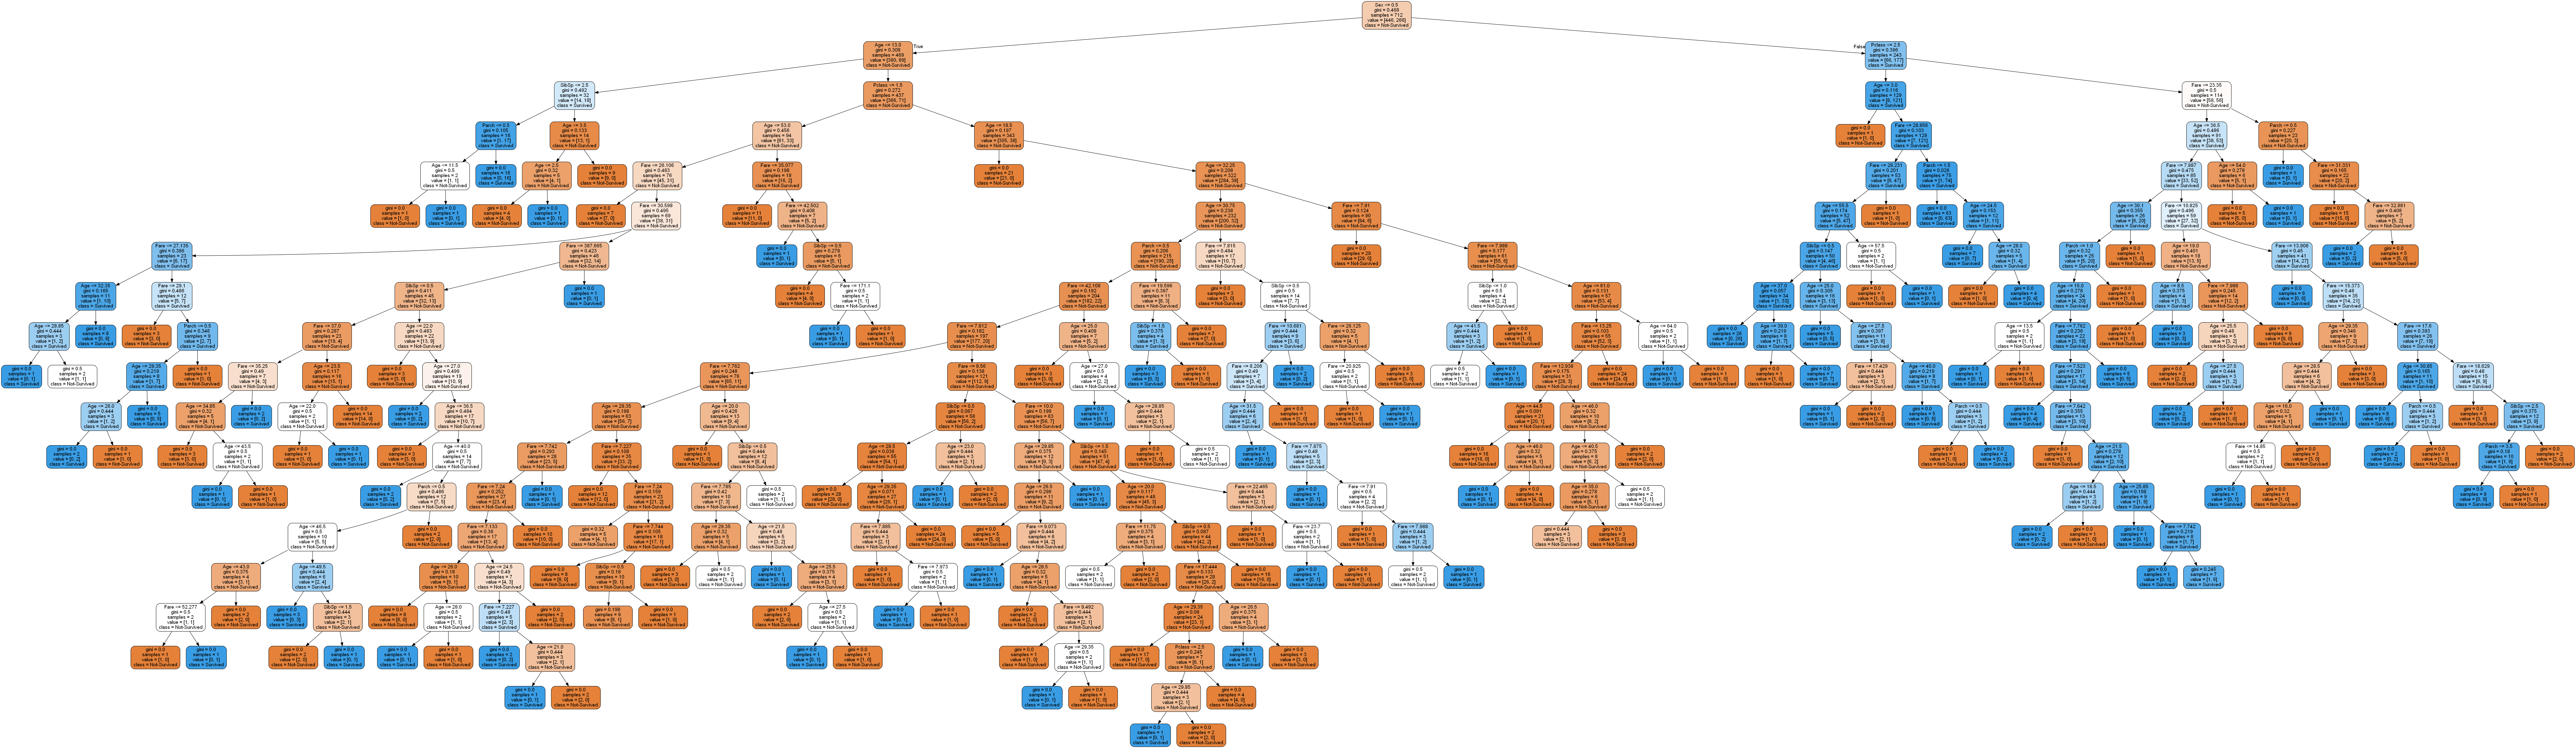

In [17]:
from sklearn.tree import export_graphviz
dotDataTrain = export_graphviz(dec_Tree_Model, out_file=None, filled=True, rounded=True, feature_names=independentFeatures, class_names=target_cls_var )
graph_train = pydotplus.graph_from_dot_data(dotDataTrain)
graph_train.write_jpeg('Survived_Passenger_TrainingSet.jpeg')
display(Image(graph_train.create_png()))

In [18]:
#Predicting the probability for Training data
y_pred_prob_train = dec_Tree_Model.predict_proba(X_train)
y_pred_prob_train[0:5]

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.]])

In [19]:
#Predicting the Accuracy score for Training data
y_pred_train_score = dec_Tree_Model.predict(X_train)
y_pred_train_score[0:5]

array([0, 1, 0, 0, 1], dtype=int64)

Fitting the model with test set

In [20]:
dec_Tree_Model.fit(X_test[independentFeatures], y_test[dependentFeatures])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

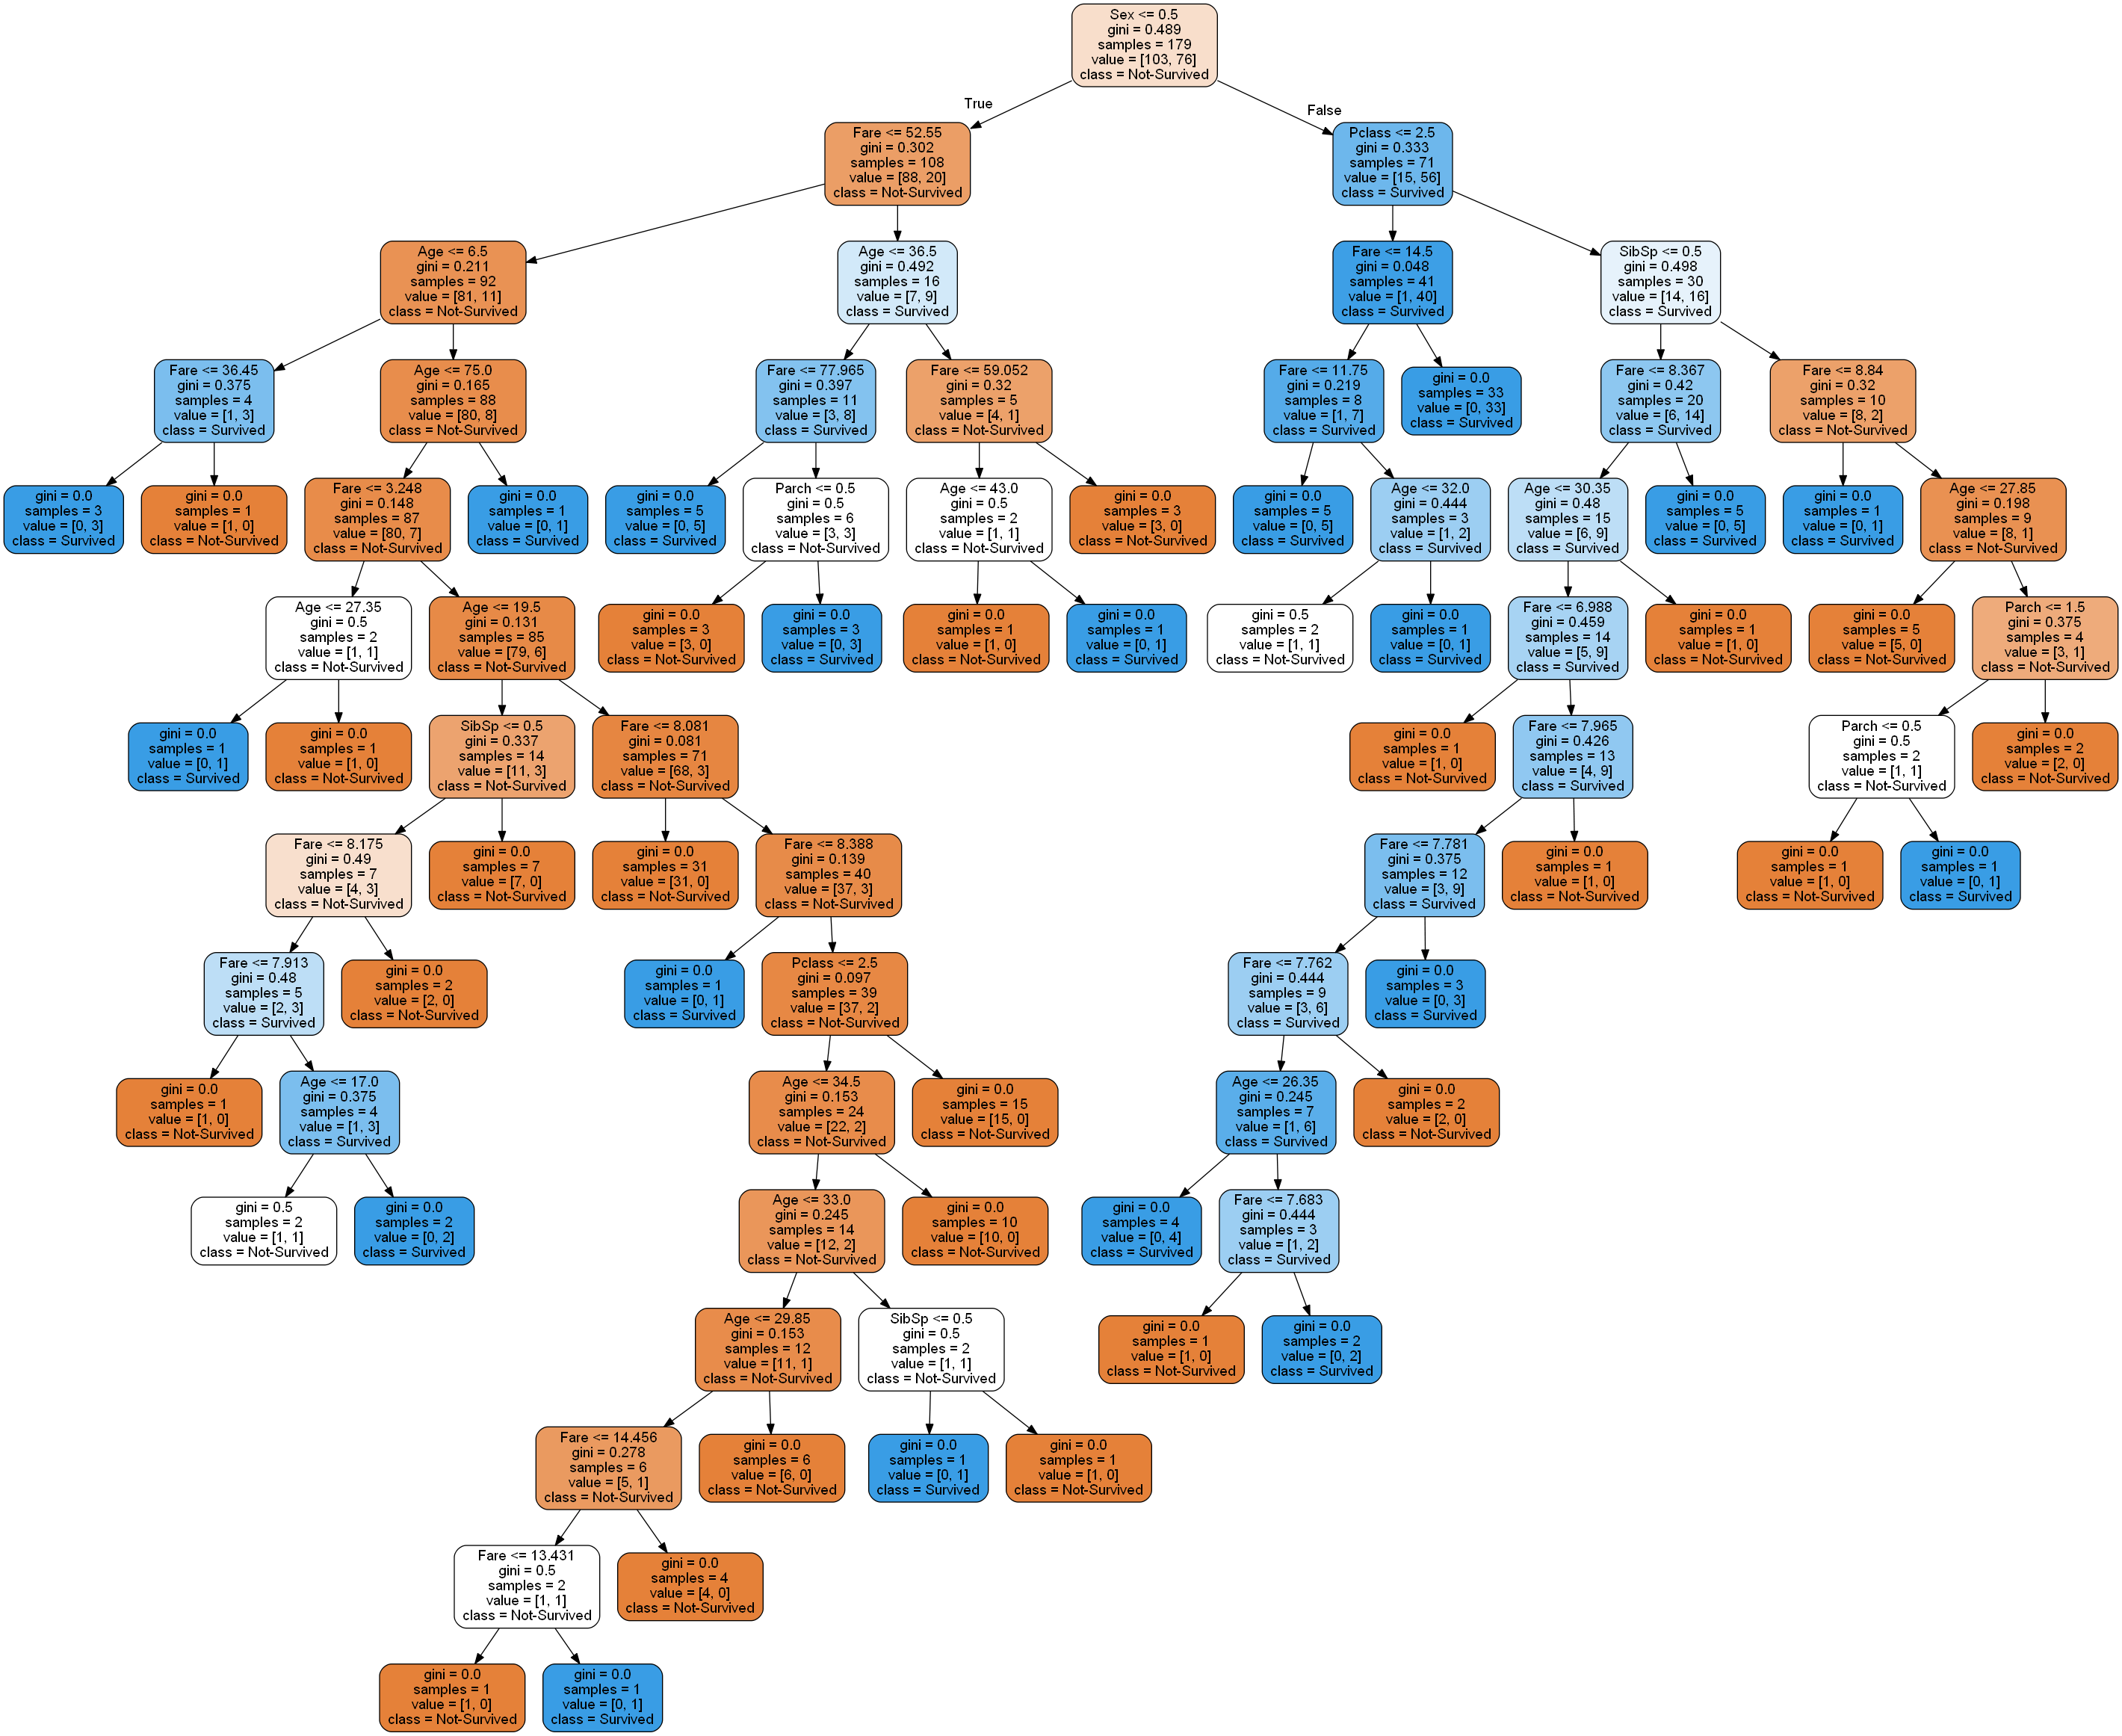

In [21]:
from sklearn.tree import export_graphviz
dotDataTrain = export_graphviz(dec_Tree_Model, out_file=None, filled=True, rounded=True, feature_names=independentFeatures, class_names=target_cls_var )
graph_train = pydotplus.graph_from_dot_data(dotDataTrain)
graph_train.write_jpeg('Survived_Passenger_TestSet.jpeg')
display(Image(graph_train.create_png()))

In [22]:
#Predicting the probability for Test data
y_pred_prob_test = dec_Tree_Model.predict_proba(X_test)
y_pred_prob_test[0:5]

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [23]:
#Predicting the Accuracy score for Test data
y_pred_test_score = dec_Tree_Model.predict(X_test)
y_pred_test_score[0:5]

array([0, 0, 1, 0, 0], dtype=int64)

# Model Performance Evaluation

In [24]:
# Test Set
count_misclassified_train = (np.array(y_test.Survived) != y_pred_test_score).sum()
print('Misclassified samples in test data: {}'.format(count_misclassified_train))
accuracy_train_data = metrics.accuracy_score(np.array(y_test.Survived), y_pred_test_score)
print('Accuracy based upon test data: {:.4f}'.format(accuracy_train_data))

Misclassified samples in test data: 2
Accuracy based upon test data: 0.9888


In [25]:
from sklearn.metrics import classification_report, confusion_matrix  
print("The Confusion matrix based upon test data \n", confusion_matrix(np.array(y_test.Survived), y_pred_test_score), "\n")  
print("The Classification report based upon test data \n",classification_report(np.array(y_test.Survived), y_pred_test_score))

The Confusion matrix based upon test data 
 [[103   0]
 [  2  74]] 

The Classification report based upon test data 
              precision    recall  f1-score   support

          0       0.98      1.00      0.99       103
          1       1.00      0.97      0.99        76

avg / total       0.99      0.99      0.99       179



# Conclusion:

As we can observe that the model misclassified 2 instances out of 177 cases in test set. Hence, the overall accuracy of this model is 98.88 % 